In [1]:
import os
import pickle

import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA, KernelPCA

In [2]:
project_path = 'C:\\Users\\danny\\Documents_Local\\Caltech_2023-2024\\CS101'

def join_path(relative_path: str) -> str:
    return os.path.join(project_path, relative_path)

def pickle_load(relative_path: str):  # -> pickled_file_contents
    return pickle.load(open(join_path(relative_path), 'rb'))

def pickle_save(obj: object, relative_path: str) -> None:
    pickle.dump(obj, open(join_path(relative_path), 'wb'))

In [3]:
ref = []
lens = []
for split_num in range(20):
    num = "0"*(2-len(str(split_num))) + str(split_num)
    ref.append(
        pickle_load(
            f'Data\\Split_Data_2\\List_Data\\reflectance_{num}_list.pkl'
        )
    )
    lens.append(ref[-1].shape[0])
ref = np.concatenate(ref, axis=0)
centers = ref.mean(axis=0)
# pickle_save(centers, 'Data\\Split_Data_2\\Full_PCA\\channel_centers.pkl')
pickle_save(centers, 'Data\\Split_Data_2\\KPCA\\Sigmoid\\channel_centers.pkl')

In [5]:
pca = PCA(n_components=ref.shape[1], whiten=True)
ref_pca = pca.fit_transform(ref)
pickle_save(pca, 'Data\\Split_Data_2\\Full_PCA\\pca_object.pkl')

In [6]:
saved = 0
path_template = 'Data\\Split_Data_2\\Full_PCA\\reflectance_(**)_pca244.pkl'
for split_num, length in enumerate(lens):
    pickle_save(
        ref_pca[saved:saved + length, :],
        path_template.replace(
            '(**)', "0"*(2-len(str(split_num))) + str(split_num)
        )
    )
    saved += length

# Kernel PCA

In [6]:
kpca = KernelPCA(n_components=ref.shape[1], kernel='sigmoid')
ref_kpca = kpca.fit(ref[::40, :])
pickle_save(kpca, 'Data\\Split_Data_2\\KPCA\\Sigmoid\\pca_object.pkl')

In [ ]:
for split_num in range(20):
    num = "0"*(2-len(str(split_num))) + str(split_num)
    pickle_save(
        kpca.transform(
            pickle_load(
                f'Data\\Split_Data_2\\List_Data\\reflectance_{num}_list.pkl'
            )
        ),
        f'Data\\Split_Data_2\\KPCA\\Sigmoid\\reflectance_{num}_list.pkl'
    )

In [ ]:
# ref_kpca = kpca.fit_transform(ref)

# saved = 0
# path_template = 'Data\\Split_Data_2\\KPCA\\Sigmoid\\reflectance_(**)_list.pkl'
# for split_num, length in enumerate(lens):
#     pickle_save(
#         ref_pca[saved:saved + length, :8],
#         path_template.replace(
#             '(**)', "0"*(2-len(str(split_num))) + str(split_num)
#         )
#     )
#     saved += length

# Visualization

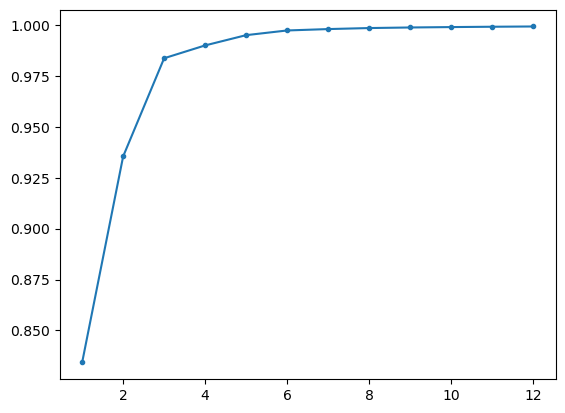

In [9]:
plt.plot(
    [i for i in range(1, len(pca.explained_variance_ratio_) + 1)][:12],
    [sum(pca.explained_variance_ratio_[:i])
        for i in range(1, len(pca.explained_variance_ratio_) + 1)
    ][:12],
    marker='.'
)

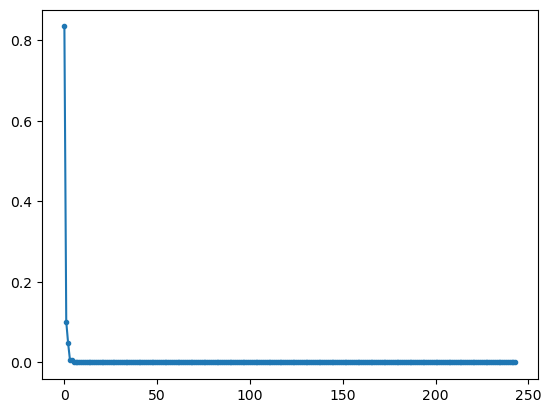

In [16]:
plt.plot(pca.explained_variance_ratio_, marker='.')

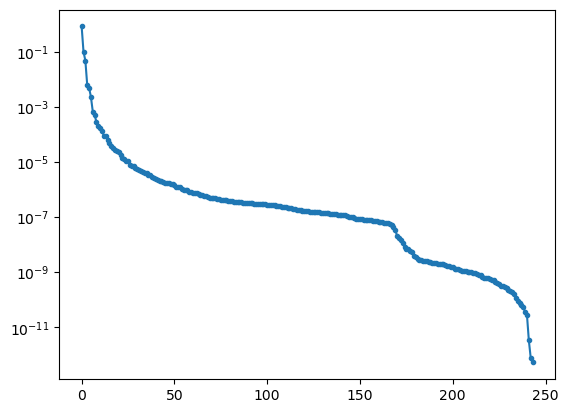

In [11]:
plt.semilogy(pca.explained_variance_ratio_, marker='.')

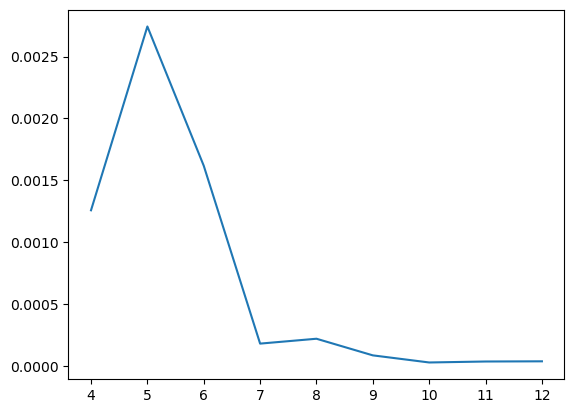

In [12]:
plt.plot(np.arange(4,13),
    (
        np.array(
            [
                pca.explained_variance_ratio_[i]
                for i in range(0,len(pca.explained_variance_ratio_))
            ]
        )[:-1]
        - np.array(
            [
                pca.explained_variance_ratio_[i]
                for i in range(1,len(pca.explained_variance_ratio_))
            ]
        )
    )[3:12]
)

In [15]:
import pandas as pd

pd.DataFrame(
    {
        'Number of Components' : np.arange(1, 245),
        'Cumulative Explained Variance Ratio' : [
                sum(pca.explained_variance_ratio_[:i])
                for i in range(1,len(pca.explained_variance_ratio_) + 1)
        ],
        'Explained Variance Ratio' : pca.explained_variance_ratio_,
    }
).to_csv(join_path('Data\\Split_Data_2\\Full_PCA\\Explained_Variance.csv'))